# Find states with the highest concentration of Superfund Sites and TRI facilities

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# read tri data in
tri_in = gpd.read_file('../data/TRI-facilities.geojson')

In [3]:
# create a copy to revert back to if necessary
tri = tri_in.copy()
tri.head()

,TRIFD,YEAR,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,...,TOTAL_CAR_OFF_SITE_RELEASE,TOTAL_CAR_RELEASE,TOTAL_TRI_WATER_RELEASE,TOTAL_TRI_AIR_RELEASE,TOTAL_TRI_LAND_RELEASE,TOTAL_TRI_LAND_RELEASE_FILTER,TOTAL_TRI_ON_SITE_RELEASE,TOTAL_TRI_OFF_SITE_RELEASE,TOTAL_TRI_RELEASE,geometry
0,00608DCRBNRD3KM,2018,IDI CARIBE INC,PR3 KM 151.8 AGUIRRE,SALINAS,SALINAS,PR,751,,,...,0.0000,13143.0000,0.0,13143.38,0.0,0.0,13143.38,7.15,13150.53,POINT (-66.23194 17.97278)
1,0060WHPNTRCARR1,2018,HP INTERNATIONAL TRADING BV (PUERTO RICO BRANC...,"CARR 110, KM. 5.1",AGUADILLA,AGUADILLA,PR,603,,,...,NaN,NaN,0.0,181.40,0.0,0.0,181.40,0.00,181.40,POINT (-67.13655 18.45647)
2,00610BXTRHROAD4,2018,EDWARDS LIFESCIENCES TECHNOLOGY SARL,STATE RD 402 KM 1.4 N LAS MARIAS IND US TRIAL ...,ANASCO,ANASCO,PR,610,,,...,0.0000,580.0000,0.0,580.00,0.0,0.0,580.00,0.00,580.00,POINT (-67.13682 18.29298)
3,00610CRBGNCARR4,2018,GE INTERNATIONAL OF PR LLC,STATE RD 402 KM 1.5 INDUSTRIAL ZONE,ANASCO,ANASCO,PR,610,,,...,1.0000,1.2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-67.14019 18.29244)
4,00612PRPCMPR681,2018,PREPA-CAMBALACHE COMBUSTION TURBINE PLANT,PR-681 KM 0.5,ARECIBO,ARECIBO,PR,612,,,...,1.8612,44.0612,0.0,0.00,0.0,0.0,0.00,0.00,0.00,POINT (-66.69940 18.47110)


In [4]:
# find total number of tri sites per state
tri_state_counts = tri['ST'].value_counts().rename_axis('state').reset_index(name='tri_count')
tri_state_counts

,state,tri_count
0,TX,1796
1,OH,1315
2,CA,1208
3,PA,1112
4,IL,1031
5,IN,902
6,WI,852
7,NC,779
8,MI,758
9,GA,697


In [5]:
# read superfund sites in
superfund = gpd.read_file('../data/superfund-sites.geojson')
superfund.head()

,siteID,EPASiteID,EPARegion,siteName,streetAddr,cityName,state,zipCode,countyName,FIPSCode,congressio,nationalPr,nonNationa,federalFac,geometry
0,100380,MAD001031574,1,Creese & Cook Tannery (Former),55 Clinton Avenue,Danvers,MA,01923,Essex,25009.0,6.0,Currently on the Final NPL,None,N,POINT (-70.92667 42.55306)
1,100392,MAD001041987,1,Baird & McGuire,775 South St,Holbrook,MA,02343,Norfolk,25021.0,9.0,Currently on the Final NPL,None,N,POINT (-71.02861 42.14971)
2,100432,MAD001197755,1,Walton & Lonsbury Inc.,78 North Avenue,Attleboro,MA,02703,Bristol,25005.0,10.0,Currently on the Final NPL,None,N,POINT (-71.29694 41.95778)
3,100438,MAD001403104,1,Olin Chemical,51 Eames St,Wilmington,MA,01887,Middlesex,25017.0,6.0,Currently on the Final NPL,None,N,POINT (-71.15389 42.52806)
4,100460,MAD002084093,1,GE - Housatonic River,"Between Pittsfield and Lenox, Ma",Pittsfield,MA,01201,Berkshire,25003.0,1.0,Proposed for NPL,None,N,POINT (-73.23222 42.45027)


In [6]:
# find total number of superfund sites per state
superfund_state_counts = superfund['state'].value_counts().rename_axis('state').reset_index(name='superfund_count')
superfund_state_counts

,state,superfund_count
0,NJ,164
1,CA,137
2,PA,132
3,WA,126
4,NY,120
5,MI,96
6,FL,87
7,MO,75
8,IL,73
9,TX,68


In [7]:
# merge two count dataframes together
counts = pd.merge(tri_state_counts, superfund_state_counts, on='state', how='left')
counts

,state,tri_count,superfund_count
0,TX,1796,68
1,OH,1315,52
2,CA,1208,137
3,PA,1112,132
4,IL,1031,73
5,IN,902,62
6,WI,852,46
7,NC,779,48
8,MI,758,96
9,GA,697,24


In [8]:
# read states shapefile in
states = gpd.read_file('../data/state-shapefile/tl_2019_us_state.shp')
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [9]:
# read state population census data in
pop = pd.read_csv('../data/census-tables/2018-state-population-data.csv', encoding='latin-1', header=1)
pop.head()

,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total MOE!!Total population,Estimate!!Percent!!Total population,Margin of Error!!Percent MOE!!Total population,Estimate!!Male!!Total population,Margin of Error!!Male MOE!!Total population,Estimate!!Percent Male!!Total population,Margin of Error!!Percent Male MOE!!Total population,...,Estimate!!Percent!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent MOE!!PERCENT ALLOCATED!!Age,Estimate!!Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Male!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Male MOE!!PERCENT ALLOCATED!!Age,Estimate!!Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Female MOE!!PERCENT ALLOCATED!!Age,Estimate!!Percent Female!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female MOE!!PERCENT ALLOCATED!!Age
0,0400000US01,Alabama,4864680,*****,(X),(X),2355799,1011,(X),(X),...,1.9,(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,0400000US02,Alaska,738516,*****,(X),(X),385579,465,(X),(X),...,2.7,(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,0400000US04,Arizona,6946685,*****,(X),(X),3453439,497,(X),(X),...,1.9,(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,0400000US05,Arkansas,2990671,*****,(X),(X),1468412,966,(X),(X),...,1.5,(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,0400000US06,California,39148760,*****,(X),(X),19453769,1122,(X),(X),...,2.0,(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [10]:
# select just identifying fields and total population estimate
pop = pop.filter(['id', 'Geographic Area Name', 'Estimate!!Total!!Total population'], axis=1)
pop = pop.rename(columns={'Geographic Area Name': 'state',
                         'Estimate!!Total!!Total population': 'total_pop'})
pop.head()

,id,state,total_pop
0,0400000US01,Alabama,4864680
1,0400000US02,Alaska,738516
2,0400000US04,Arizona,6946685
3,0400000US05,Arkansas,2990671
4,0400000US06,California,39148760


In [11]:
# create GEOID field to join with, last 2 digits from the id field
pop['GEOID'] = pop['id'].str[-2:]
pop.head()

,id,state,total_pop,GEOID
0,0400000US01,Alabama,4864680,01
1,0400000US02,Alaska,738516,02
2,0400000US04,Arizona,6946685,04
3,0400000US05,Arkansas,2990671,05
4,0400000US06,California,39148760,06


In [12]:
# join population data to state shapefile
states = pd.merge(states, pop, on='GEOID', how='left')
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,id,state,total_pop
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",0400000US54,West Virginia,1829054.0
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",0400000US12,Florida,20598139.0
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",0400000US17,Illinois,12821497.0
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",0400000US27,Minnesota,5527358.0
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",0400000US24,Maryland,6003435.0
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677787140,1323663210,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ...",0400000US44,Rhode Island,1056611.0
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049897859,2391604238,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8...",0400000US16,Idaho,1687809.0
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23189198255,1026903434,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600...",0400000US33,New Hampshire,1343622.0
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125925929633,13463401534,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073...",0400000US37,North Carolina,10155624.0
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23874197924,1030383955,+44.0685773,-072.6691839,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",0400000US50,Vermont,624977.0


In [13]:
# join TRI and superfund counts to state data
states = pd.merge(states, counts, left_on='STUSPS', right_on='state', how='left')
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,AWATER,INTPTLAT,INTPTLON,geometry,id,state_x,total_pop,state_y,tri_count,superfund_count
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",0400000US54,West Virginia,1829054.0,WV,170,14
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",0400000US12,Florida,20598139.0,FL,684,87
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",0400000US17,Illinois,12821497.0,IL,1031,73
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",0400000US27,Minnesota,5527358.0,MN,508,46
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",0400000US24,Maryland,6003435.0,MD,161,31
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,...,1323663210,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ...",0400000US44,Rhode Island,1056611.0,RI,81,37
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,...,2391604238,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8...",0400000US16,Idaho,1687809.0,ID,117,26
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,...,1026903434,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600...",0400000US33,New Hampshire,1343622.0,NH,117,27
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,...,13463401534,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073...",0400000US37,North Carolina,10155624.0,NC,779,48
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,...,1030383955,+44.0685773,-072.6691839,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",0400000US50,Vermont,624977.0,VT,37,16


In [14]:
list(states.columns)

['REGION',
 'DIVISION',
 'STATEFP',
 'STATENS',
 'GEOID',
 'STUSPS',
 'NAME',
 'LSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'geometry',
 'id',
 'state_x',
 'total_pop',
 'state_y',
 'tri_count',
 'superfund_count']

In [15]:
# filter to only keep the fields I need
states = states.filter(['GEOID', 'STUSPS', 'NAME', 'ALAND', 'geometry', 'id', 'total_pop', 'tri_count', 'superfund_count'])
states.head()

,GEOID,STUSPS,NAME,ALAND,geometry,id,total_pop,tri_count,superfund_count
0,54,WV,West Virginia,62266231560,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",0400000US54,1829054.0,170,14
1,12,FL,Florida,138947364717,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",0400000US12,20598139.0,684,87
2,17,IL,Illinois,143779863817,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",0400000US17,12821497.0,1031,73
3,27,MN,Minnesota,206230065476,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",0400000US27,5527358.0,508,46
4,24,MD,Maryland,25151726296,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",0400000US24,6003435.0,161,31


In [16]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# convert land area from square meters to square miles
states['ALAND_square_miles'] = states['ALAND'] / 2589988.110336

# calculate tri facilities per square mile
states['tri_density'] = states['tri_count']/states['ALAND_square_miles']

# caluclate superfund sites per square mile
states['superfund_density'] = states['superfund_count']/states['ALAND_square_miles']

# calculate population density
states['pop_density'] = states['total_pop']/states['ALAND_square_miles']

states.head()

,GEOID,STUSPS,NAME,ALAND,geometry,id,total_pop,tri_count,superfund_count,ALAND_square_miles,tri_density,superfund_density,pop_density
0,54,WV,West Virginia,62266231560,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",0400000US54,1829054.00000,170,14,24041.12641,0.00707,0.00058,76.08021
1,12,FL,Florida,138947364717,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",0400000US12,20598139.00000,684,87,53647.87744,0.01275,0.00162,383.95068
2,17,IL,Illinois,143779863817,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",0400000US17,12821497.00000,1031,73,55513.71577,0.01857,0.00131,230.96089
3,27,MN,Minnesota,206230065476,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",0400000US27,5527358.00000,508,46,79625.87344,0.00638,0.00058,69.41661
4,24,MD,Maryland,25151726296,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",0400000US24,6003435.00000,161,31,9711.13581,0.01658,0.00319,618.20112


### Find areas(s) with highest concentration of TRI facilities

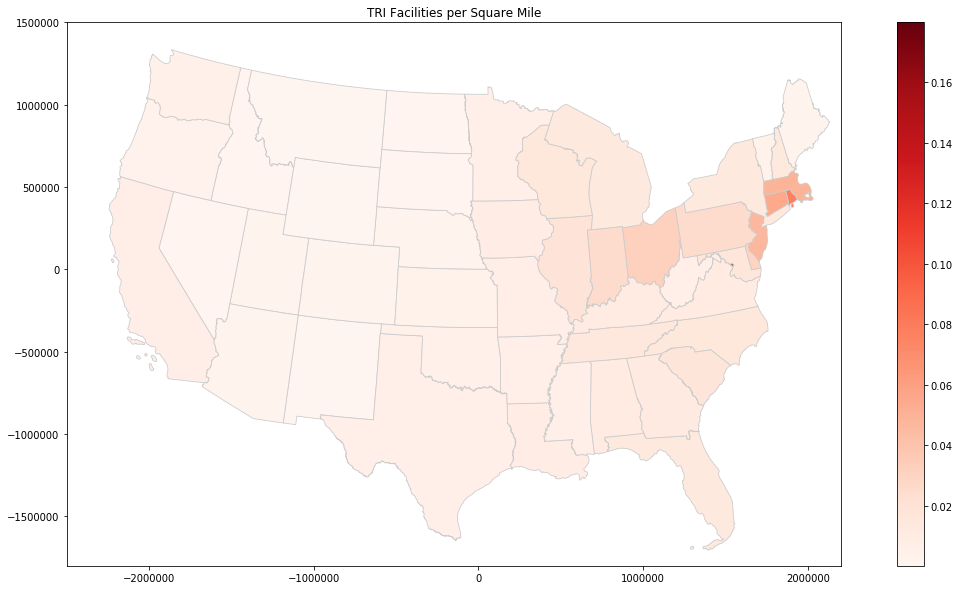

In [17]:
# project layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

variable = 'tri_density'

vmin, vmax = states['tri_density'].min(), states['tri_density'].max()

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set(
    xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='TRI Facilities per Square Mile');

# create legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to map
cbar = fig.colorbar(sm)

print;

### Try to find area(s) with highest concentration of Superfund sites

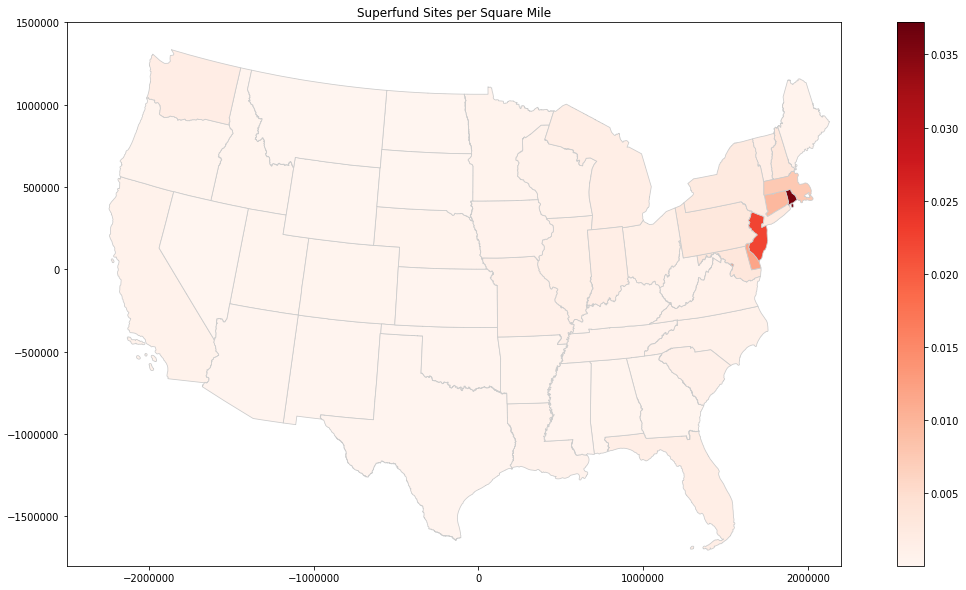

In [18]:
variable = 'superfund_density'

vmin, vmax = states['superfund_density'].min(), states['superfund_density'].max()

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set(
    xlim=(-2500000,2200000), ylim=(-1800000,1500000), 
    title='Superfund Sites per Square Mile');

# create legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to map
cbar = fig.colorbar(sm)

print;

The northeast clearly has the highest concentration of both Superfund sites and TRI facilities. Next I will export the file to GeoJSON, and bring it in the QGIS for more visualization and exploration.

In [19]:
# convert crs to WGS84 for web mapping
states = states.to_crs(epsg=4326)

# write to file
states.to_file('../data/state-counts.geojson', driver='GeoJSON')